# Simulating logic gates using `crysx_nn`

In [25]:
import numpy as np
import matplotlib.pyplot as plt


# Import CrysX_nn related stuff

# Import loss functions
from crysx_nn.loss import MSE_loss, MSE_loss_grad
from crysx_nn.loss import BCE_loss, BCE_loss_grad
# Import activation functions
from crysx_nn.activation import Sigmoid, Sigmoid_grad
from crysx_nn.activation import Softmax, Softmax_grad
from crysx_nn.activation import Tanh_offset, Tanh_offset
# Import neural network functions
from crysx_nn.network import back_propagation, back_propagation_fast
from crysx_nn.network import nn_optimize, nn_optimize_fast
from crysx_nn.network import forward_feed

from crysx_nn.network import visualize

## Define some network parameters that we will be using later on

In [32]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Sigmoid', 'Sigmoid']
nLayers = len(neurons_per_layer)
eeta = 0.5
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Visualize the network

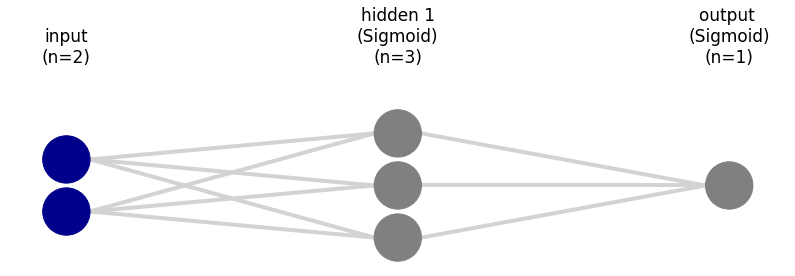

In [33]:
visualize(nInputs, neurons_per_layer, activation_func_names)

## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [34]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype('float32')
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [35]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T

In [36]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## Generate initial weights and biases

In [37]:
from crysx_nn.network import initParams
weightsOriginal, biasesOriginal = initParams(nInputs, neurons_per_layer, method='Xavier')
print('Weights matrices: \n', weightsOriginal)
print('Biases: \n', biasesOriginal)

Weights matrices: 
 [array([[-0.61979737,  0.07541748],
       [ 0.1316069 , -0.67034901],
       [ 0.18497999, -0.25721774]]), array([[-0.00756673,  0.1604136 ,  0.52756856]])]
Biases: 
 [array([0., 0., 0.]), array([0.])]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [8]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [9]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2027153626732802


### Visualize the training loss

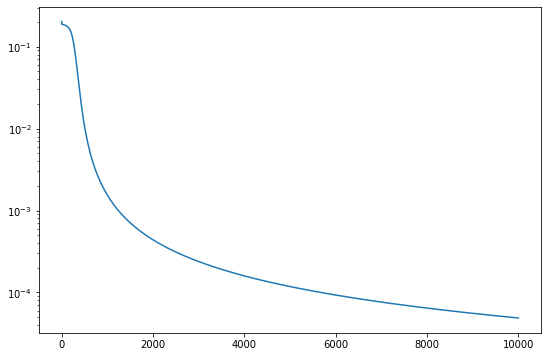

In [10]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [11]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-0.640449  ,  0.18231236],
       [ 0.09433048,  0.3485314 ],
       [ 0.38173656, -0.30678687],
       [-0.05397484, -0.97740753],
       [-0.22964811, -0.54177266],
       [-0.20551067,  0.11275496],
       [-0.48690538, -0.39509781],
       [-0.1671988 ,  0.3614677 ],
       [-0.01210498,  0.70405211],
       [ 0.32918702,  0.35194485],
       [-0.7031208 , -0.0786226 ],
       [ 0.02472407, -0.93927023],
       [-0.19275673,  0.5478652 ],
       [ 0.98970252,  0.08684227],
       [-0.51431431, -0.81616064],
       [ 0.77530953,  0.53459298],
       [ 0.61618682,  0.95226813],
       [-0.65582841,  0.04487986],
       [-0.07138257, -0.72195589],
       [ 0.33239088,  0.75286287],
       [ 0.09309884,  0.71587085],
       [ 0.52550958, -0.10044668],
       [-0.56143232, -0.23656567],
       [-0.77421286, -0.92394847],
       [ 0.02574668,  0.24086953],
       [-0.65534676, -0.81964137],
       [-0.10094012,  0.71917248],
       [ 0.95879862,  0.17758329],

### Make predictions using the optimized weights

In [12]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.5013446 , 0.49825995, 0.50025066, 0.5162683 , 0.51007604,
        0.50121456, 0.5169717 , 0.49975549, 0.49504609, 0.49397654,
        0.50944598, 0.51071055, 0.49922662, 0.48168047, 0.54314567,
        0.45786163, 0.43198573, 0.50478688, 0.50790905, 0.47765559,
        0.49130877, 0.49844696, 0.51047683, 0.58731815, 0.49862884,
        0.55915638, 0.49695101, 0.47745452, 0.5575596 , 0.50166088,
        0.50080564, 0.54667376, 0.49154213, 0.50631764, 0.50387859,
        0.50057188, 0.51369419, 0.49317574, 0.4949677 , 0.49870554,
        0.52161535, 0.48457267, 0.52723508, 0.44323239, 0.59523152,
        0.52367333, 0.50530236, 0.50263035, 0.49427887, 0.40930445,
        0.52114582, 0.48216442, 0.50408549, 0.47947409, 0.47651509,
        0.53241271, 0.50963837, 0.49865185, 0.51977201, 0.5015792 ,
        0.48150395, 0.49992425, 0.50528323, 0.509

## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [13]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputNAND, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.3290112895724575


### Visualize the training loss

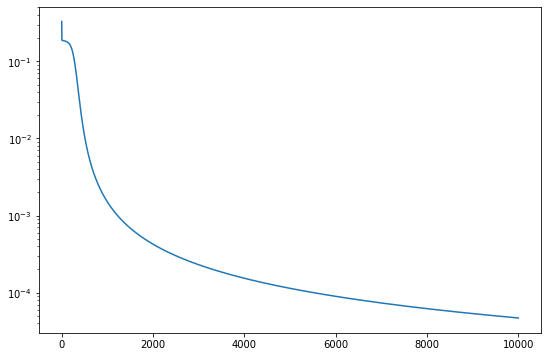

In [14]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [15]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-0.75101505,  0.0822972 ],
       [ 0.15761636,  0.41488147],
       [ 0.47455036, -0.21563746],
       [ 0.0051862 , -0.90201385],
       [-0.21160739, -0.52275283],
       [-0.00538628,  0.31670366],
       [-0.41194606, -0.32160759],
       [-0.17966515,  0.34874777],
       [-0.00942757,  0.70810844],
       [ 0.39345395,  0.41728357],
       [-0.60345659,  0.01080324],
       [ 0.03906701, -0.92187787],
       [-0.11150875,  0.63682968],
       [ 0.9586893 ,  0.0636953 ],
       [-0.53518177, -0.84210956],
       [ 0.63409062,  0.40409446],
       [ 0.59548362,  0.92900904],
       [-0.57691883,  0.11713451],
       [-0.24018763, -0.9279392 ],
       [ 0.35536851,  0.78088894],
       [ 0.11519804,  0.74223567],
       [ 0.35524085, -0.26638386],
       [-0.63050044, -0.30231657],
       [-0.76917181, -0.92087747],
       [-0.14582251,  0.06684461],
       [-0.61648657, -0.77774375],
       [-0.09154893,  0.73103422],
       [ 1.01376546,  0.22097122],

### Make predictions using the optimized weights

In [16]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputNAND)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputNAND)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.50430642, 0.4953388 , 0.49953879, 0.50946417, 0.50907159,
        0.49849775, 0.51023828, 0.49948605, 0.4949611 , 0.48899389,
        0.50439928, 0.50907189, 0.49777905, 0.48498121, 0.54876247,
        0.48252715, 0.43938879, 0.50222025, 0.52866811, 0.47372964,
        0.48951213, 0.49985129, 0.51655423, 0.58538316, 0.50170849,
        0.54762087, 0.49652596, 0.46972707, 0.54215386, 0.50123382,
        0.49893362, 0.54879504, 0.49411907, 0.5026721 , 0.50081565,
        0.49970737, 0.51316917, 0.49258159, 0.50012305, 0.48817697,
        0.52575386, 0.47869897, 0.52228267, 0.4594495 , 0.57973651,
        0.51537349, 0.51391196, 0.50607231, 0.48930788, 0.44145167,
        0.52178399, 0.48824833, 0.50547008, 0.47264751, 0.48732148,
        0.54074547, 0.52299566, 0.49951391, 0.51398254, 0.50662707,
        0.47909976, 0.49920712, 0.50214874, 0.507

## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [17]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.3286067532260244


### Visualize the training loss

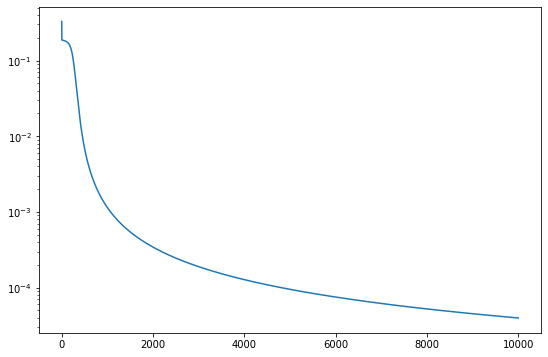

In [18]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-5.72511679e-01,  2.40809010e-01],
       [ 7.78759581e-02,  3.27788769e-01],
       [ 4.03705424e-01, -2.85161750e-01],
       [-3.73412820e-02, -8.71174566e-01],
       [-1.71398611e-01, -4.64026899e-01],
       [-1.70702758e-01,  1.49792392e-01],
       [-4.33699011e-01, -3.41258880e-01],
       [-1.19099676e-01,  4.05568660e-01],
       [ 3.58029449e-02,  7.17702037e-01],
       [ 3.44006986e-01,  3.62284688e-01],
       [-6.11653363e-01, -1.32183967e-02],
       [ 1.89098572e-02, -8.69196169e-01],
       [-2.19447198e-01,  5.14327164e-01],
       [ 9.14181836e-01,  8.79695836e-02],
       [-5.53806320e-01, -8.01064802e-01],
       [ 8.33616472e-01,  6.21239509e-01],
       [ 7.98082245e-01,  1.04750982e+00],
       [-5.65020920e-01,  1.19406084e-01],
       [-2.60378238e-02, -6.49487671e-01],
       [ 4.00276309e-01,  7.70836386e-01],
       [ 9.66455709e-02,  6.83408818e-01],
       [ 4.72759529e-01, -1.47929123e-01],
       [-5.43158825e-01, -2.30483

### Make predictions using the optimized weights

In [20]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.50187858, 0.4996249 , 0.49961772, 0.50879957, 0.50201461,
        0.50037448, 0.50338543, 0.49875533, 0.49519936, 0.49803092,
        0.5039215 , 0.50906315, 0.49915823, 0.48988504, 0.5119139 ,
        0.48390484, 0.47191713, 0.50323834, 0.50185159, 0.49078527,
        0.4959243 , 0.4984606 , 0.50313576, 0.53738958, 0.49946062,
        0.52313924, 0.49669091, 0.48956961, 0.52277388, 0.50074392,
        0.50029029, 0.51581936, 0.49423896, 0.50219728, 0.50115291,
        0.5006408 , 0.50545841, 0.49875718, 0.49832757, 0.49908304,
        0.50526033, 0.49617887, 0.51280876, 0.47760548, 0.54389745,
        0.50849051, 0.5054512 , 0.50063042, 0.49699699, 0.45820669,
        0.50903246, 0.49028466, 0.50247818, 0.49098958, 0.49090802,
        0.51049324, 0.50536893, 0.50050216, 0.50682643, 0.50008772,
        0.4956254 , 0.50015684, 0.50201543, 0.506

## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

In [21]:

# Run optimization
optWeights, optBiases, errorPlot = nn_optimize_fast(inputs, outputXOR, activation_func_names, nLayers, nEpochs=nEpochs, batchSize=batchSize, eeta=eeta, weights=weightsOriginal, biases=biasesOriginal, errorFunc=MSE_loss, gradErrorFunc=MSE_loss_grad,miniterEpoch=1,batchProgressBar=False,miniterBatch=100)



  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2658058455575434


### Visualize the training loss

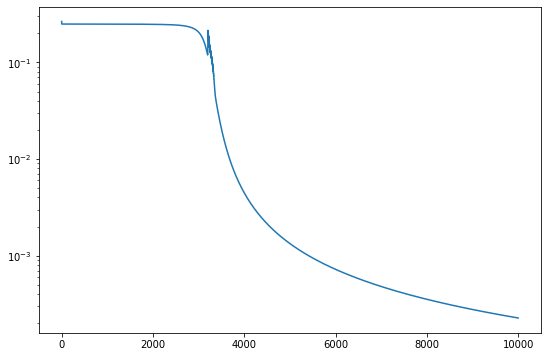

In [22]:
# Plot the error vs epochs
plt.plot(errorPlot)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [23]:
# Optimized weights and biases
print('Optimized Weights: ', optWeights)
print('Optimized Biases: ', optBiases)

Optimized Weights:  [array([[-7.17978411e-01,  1.48096910e-01],
       [ 2.88136592e-01,  5.80987097e-01],
       [ 4.58747431e-01, -2.35200504e-01],
       [-7.05311912e-03, -1.17464134e+00],
       [-2.37161819e-01, -5.87065669e-01],
       [ 1.26080089e-03,  3.31107138e-01],
       [-3.73648074e-01, -2.84868936e-01],
       [-6.39942873e-02,  4.80297726e-01],
       [ 6.56301039e-02,  8.66659511e-01],
       [ 4.25167322e-01,  4.53328874e-01],
       [-5.85717926e-01,  4.64597737e-02],
       [ 9.47736027e-02, -1.08599966e+00],
       [-7.96815133e-02,  7.68533905e-01],
       [ 1.16784752e+00,  3.94129498e-02],
       [-4.50455173e-01, -7.71417719e-01],
       [ 7.54300848e-01,  5.45734366e-01],
       [ 8.78781933e-01,  1.08462778e+00],
       [-6.68385694e-01,  4.04164355e-02],
       [-9.29334770e-02, -1.09468295e+00],
       [ 3.55068740e-01,  8.46862085e-01],
       [ 1.30679111e-01,  8.55821385e-01],
       [ 3.70471047e-01, -2.49190949e-01],
       [-6.36016424e-01, -2.71490

### Make predictions using the optimized weights

In [24]:
# Forward feed with optimized weights
# Perform Forward feed and get the outputs at each layers and the inputs at each layer
a, z = forward_feed(inputs, nLayers, optWeights, optBiases, activation_func_names)
print('Outputs at each layer (including input layer):\n ',a)
print('Inputs at each layer :\n ', z)
# New Error
print('New Average Error with optimized weights:\n', MSE_loss(a[nLayers],outputXOR)/batchSize)
print('Input: ',inputs)
print('Output: ',a[nLayers])
print('Expected Output: ',outputXOR)

Outputs at each layer (including input layer):
  [array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32), array([[0.48946412, 0.4749121 , 0.49897135, 0.5169749 , 0.51272327,
        0.49583421, 0.50436231, 0.49565468, 0.48330354, 0.4686632 ,
        0.49618155, 0.49188439, 0.50549508, 0.47057564, 0.54158555,
        0.46305094, 0.47483744, 0.50073181, 0.52842532, 0.44676406,
        0.47655681, 0.49436336, 0.51757767, 0.50787197, 0.49503276,
        0.51801422, 0.49299414, 0.46809061, 0.53987649, 0.4942122 ,
        0.49608833, 0.55498785, 0.48415978, 0.51245227, 0.49808423,
        0.4586001 , 0.51999206, 0.47812327, 0.4959328 , 0.4905244 ,
        0.52331825, 0.46775098, 0.52407258, 0.48399118, 0.76204312,
        0.52718497, 0.47620551, 0.50005936, 0.48356199, 0.33573158,
        0.5164808 , 0.47853883, 0.49111112, 0.45063717, 0.45922271,
        0.54391092, 0.50505851, 0.51336042, 0.52258742, 0.51690258,
        0.46979392, 0.49926585, 0.50151844, 0.490